In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [1]:
data_path = 'Student_performance_data _.csv'
data = pd.read_csv(data_path)


data.head()


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


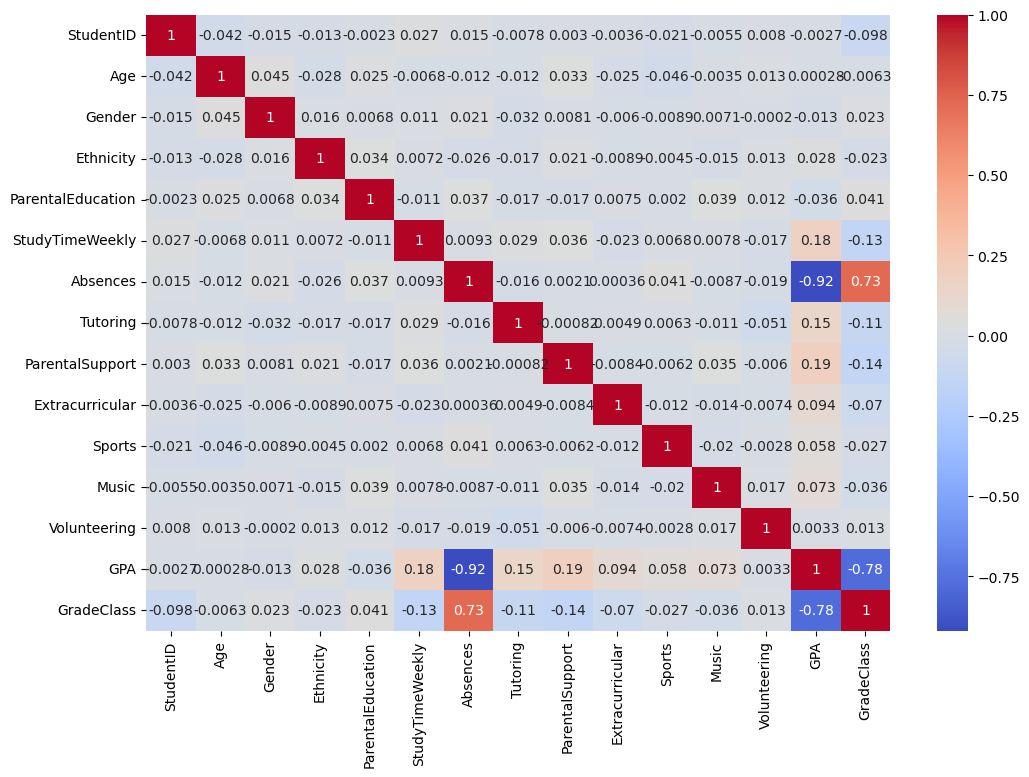

In [3]:
# Summary
data.describe()

# missing values
data.isnull().sum()

plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()


In [4]:
# Fill missing values with the median value of that columns
data = data.fillna(data.median())

# check if still missing values are there
data.isnull().sum()


StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

no missing values

In [7]:
# 'score' is the target variable
X = data.drop('GPA', axis=1)  # Features
y = data['GPA']  # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

### Why choose these regression models

Ridge Regression can handle correlated predictors by adding an L2 penalty, which helps in stabilizing the estimates.
By controlling for large coefficients, Ridge Regression can improve the model's ability to generalize to new data.

Lasso Regression can shrink some coefficients to zero, effectively performing feature selection. This can help identify the most important predictors of student performance and simplify the model.

Decision Tree Regression can model complex, non-linear relationships between features and the target variable, which is in the case in student performance data. Decision trees provide a clear and visual representation of decision rules, making it easier to understand how different factors influence student performance.

In [9]:
# Dictionary of regression models
models = {
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree Regression': DecisionTreeRegressor()
}

# Train and evaluate the models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2': r2}

# Display the results
results_df = pd.DataFrame(results).T
results_df


,MSE,R2
Ridge Regression,0.035847,0.956651
Lasso Regression,0.141227,0.829216
Decision Tree Regression,0.085245,0.896914


In [11]:
results_df.sort_values(by='R2', ascending=False) #sort results

,MSE,R2
Ridge Regression,0.035847,0.956651
Decision Tree Regression,0.085245,0.896914
Lasso Regression,0.141227,0.829216
